## Load Data

In [133]:
# installing dependencies
%pip install matplotlib
%pip install pandas
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Importing dependencies and loading data from CSV

In [134]:
import pandas as pd

# loading sales data from a CSV file into DataFrame
customers_data = pd.read_csv('../ShopEase Data/customers.csv')
inventory_data = pd.read_csv('../ShopEase Data/inventory.csv')
order_item_data = pd.read_csv('../ShopEase Data/order_items.csv')
orders_data = pd.read_csv('../ShopEase Data/Orders.csv')
products_data = pd.read_csv('../ShopEase Data/products.csv')
suppliers_data = pd.read_csv('../ShopEase Data/suppliers_data.csv')

customers_data_df = pd.DataFrame(customers_data)
inventory_data_df = pd.DataFrame(inventory_data)
order_item_data_df = pd.DataFrame(order_item_data)
orders_data_df = pd.DataFrame(orders_data)
products_data_df = pd.DataFrame(products_data)
suppliers_data_df = pd.DataFrame(suppliers_data)



In [135]:
# printing the first 5 rows of each DataFrame

print("Customers Data:\n") 
display(customers_data_df.head()) #customers_data_df.head()
print("\nInventory Data:\n") 
display(inventory_data_df.head()) #inventory_data_df.head()
print("\nOrder Items Data:\n"),
display(order_item_data_df.head()) #order_item_data_df.head()
print("\nOrders Data:\n") 
display(orders_data_df.head()) #orders_data_df.head()
print("\nProducts Data:\n") 
display(products_data_df.head()) #products_data_df.head()
print("\nSuppliers Data:\n")
display(suppliers_data_df.head()) #suppliers_data_df.head()

Customers Data:



,customer_id,customer_name,email,join_date
0,1,Alice Johnson,alice@example.com,2023-01-15
1,2,Bob Smith,bob@example.com,2023-02-20
2,3,Charlie Davis,charlie@example.com,2023-03-05
3,4,David Lee,david@example.com,2023-03-10
4,5,Eve Parker,eve@example.com,2023-04-01



Inventory Data:



,product_name,stock_quantity,stock_date,supplier,warehouse_location
0,Sugar,162,11/3/2024,Supplier D,Warehouse 3
1,Tablet,243,10/30/2024,Supplier C,Warehouse 2
2,Jeans,223,10/24/2024,Supplier B,Warehouse 3
3,Women's Jacket,187,8/31/2024,Supplier E,Warehouse 3
4,Blender,101,11/6/2024,Supplier E,Warehouse 1



Order Items Data:



,order_detail_id,order_id,quantity,product_id
0,1,1,3,34
1,2,1,2,47
2,3,2,4,10
3,4,2,3,77
4,5,3,2,76



Orders Data:



,order_id,customer_id,order_date,product_id,quantity
0,1,20,11/1/2024,3,2
1,2,36,11/1/2024,1,1
2,3,1,11/1/2024,8,3
3,4,36,11/2/2024,6,1
4,5,14,11/2/2024,12,2



Products Data:



,product_id,product_name,category,price
0,1,Laptop,Electronics,1200.0
1,2,Smartphone,Electronics,800.0
2,3,Tablet,Electronics,450.0
3,4,Wireless Mouse,Electronics,25.0
4,5,Keyboard,Electronics,50.0



Suppliers Data:



,supplier_name,supplier_address,email,contact_number,fax,account_number,order_history,contract,supplier_country,supplier_city,country_code
0,Supplier D,321 Pine St,supplierD@example.com,4567890123,3987654318,44445555,468,No,Germany,Berlin,49
1,Supplier D,321 Pine St,supplierD@example.com,4567890123,3987654318,44445555,61,No,Germany,Berlin,49
2,Supplier D,321 Pine St,supplierD@example.com,4567890123,3987654318,44445555,88,No,Germany,Berlin,49
3,Supplier A,123 Main St,supplierA@example.com,1234567890,987654321,11112222,353,Yes,USA,New York,1
4,Supplier D,321 Pine St,supplierD@example.com,4567890123,3987654318,44445555,547,No,Germany,Berlin,49


## Data Cleaning

In [136]:
# printing data types of each column in  each DataFrame
print('Customer DataFrame:')
print(customers_data_df.dtypes)

print('\nInventory DataFrame:')
print(inventory_data_df.dtypes)

print('\nOrder Items DataFrame:')
print(order_item_data_df.dtypes)

print('\nOrders DataFrame:')
print(orders_data_df.dtypes)

print('\nProducts DataFrame:')
print(products_data_df.dtypes)

print('\nSuppliers DataFrame:')
print(suppliers_data_df.dtypes)


Customer DataFrame:
customer_id       int64
customer_name    object
email            object
join_date        object
dtype: object

Inventory DataFrame:
product_name          object
stock_quantity         int64
stock_date            object
supplier              object
warehouse_location    object
dtype: object

Order Items DataFrame:
order_detail_id    int64
order_id           int64
quantity           int64
product_id         int64
dtype: object

Orders DataFrame:
order_id        int64
customer_id     int64
order_date     object
product_id      int64
quantity        int64
dtype: object

Products DataFrame:
product_id        int64
product_name     object
category         object
price           float64
dtype: object

Suppliers DataFrame:
supplier_name       object
supplier_address    object
email               object
contact_number       int64
fax                  int64
account_number       int64
order_history        int64
contract            object
supplier_country    object
supplier_cit

In [137]:
# Handle missing values, remove duplicates, and convert data types in each column appropriately for each DataFrame


def clean_data(df_list):
    """A function to take in a list of DataFrames and clean it appropriately

    Args:
        df_list (list): List of DataFrames

    Returns:
        list: A list of cleaned DataFrames
    """
    
    cleaned_dfs =  []
    
    for df in df_list:
        df_copy = df.copy() # Making a copy of the DataFrame
        df_copy.dropna(inplace=True) # Drop rows with missing values
        df_copy.drop_duplicates(inplace=True) # Remove duplicate rows (records)
        
        for col in df_copy.select_dtypes(include=['object', 'datetime64[ns]', 'int64', 'float64']).columns:
            match df_copy[col].dtype:
                case 'object':
                    df_copy[col] = df_copy[col].str.strip() # Remove leading and trailing whitespace
                    
                    if 'date' in col.lower(): # If the column name contains 'date', convert to datetime
                        try: # Try to convert to datetime using a specific format. If it fails, convert to string
                            df_copy[col] = pd.to_datetime(df_copy[col], errors='coerce')
                        except ValueError:
                            pass # If conversion fails, keep the column as string
                    else:
                        df_copy[col] = df_copy[col].astype('string')
                        
                case 'datetime64[ns]':
                    df_copy[col] = pd.to_datetime(df_copy[col], errors='coerce')
                    
                case 'int64':
                    df_copy[col] = df_copy[col].astype('int64')
                    
                case 'float64':
                    df_copy[col] = df_copy[col].astype('float64')
                    
        cleaned_dfs.append(df_copy)
    return cleaned_dfs


cleaned_dfs = clean_data([customers_data_df, inventory_data_df, order_item_data_df, orders_data_df, products_data_df, suppliers_data_df])

# Display the first 5 rows of each cleaned DataFrame
for each_df in cleaned_dfs:
    (display(each_df.head()))



,customer_id,customer_name,email,join_date
0,1,Alice Johnson,alice@example.com,2023-01-15
1,2,Bob Smith,bob@example.com,2023-02-20
2,3,Charlie Davis,charlie@example.com,2023-03-05
3,4,David Lee,david@example.com,2023-03-10
4,5,Eve Parker,eve@example.com,2023-04-01


,product_name,stock_quantity,stock_date,supplier,warehouse_location
0,Sugar,162,2024-11-03,Supplier D,Warehouse 3
1,Tablet,243,2024-10-30,Supplier C,Warehouse 2
2,Jeans,223,2024-10-24,Supplier B,Warehouse 3
3,Women's Jacket,187,2024-08-31,Supplier E,Warehouse 3
4,Blender,101,2024-11-06,Supplier E,Warehouse 1


,order_detail_id,order_id,quantity,product_id
0,1,1,3,34
1,2,1,2,47
2,3,2,4,10
3,4,2,3,77
4,5,3,2,76


,order_id,customer_id,order_date,product_id,quantity
0,1,20,2024-11-01,3,2
1,2,36,2024-11-01,1,1
2,3,1,2024-11-01,8,3
3,4,36,2024-11-02,6,1
4,5,14,2024-11-02,12,2


,product_id,product_name,category,price
0,1,Laptop,Electronics,1200.0
1,2,Smartphone,Electronics,800.0
2,3,Tablet,Electronics,450.0
3,4,Wireless Mouse,Electronics,25.0
4,5,Keyboard,Electronics,50.0


,supplier_name,supplier_address,email,contact_number,fax,account_number,order_history,contract,supplier_country,supplier_city,country_code
0,Supplier D,321 Pine St,supplierD@example.com,4567890123,3987654318,44445555,468,No,Germany,Berlin,49
1,Supplier D,321 Pine St,supplierD@example.com,4567890123,3987654318,44445555,61,No,Germany,Berlin,49
2,Supplier D,321 Pine St,supplierD@example.com,4567890123,3987654318,44445555,88,No,Germany,Berlin,49
3,Supplier A,123 Main St,supplierA@example.com,1234567890,987654321,11112222,353,Yes,USA,New York,1
4,Supplier D,321 Pine St,supplierD@example.com,4567890123,3987654318,44445555,547,No,Germany,Berlin,49


In [138]:
# Unpacking the cleaned DataFrames into new variables starting with c_ standing for cleaned
c_customers_data_df, c_inventory_data_df, c_order_item_data_df, c_orders_data_df, c_products_data_df, c_suppliers_data_df = cleaned_dfs

# printing data types of each column in  each DataFrame
print('Customer DataFrame:')
print(c_customers_data_df.dtypes)

print('\nInventory DataFrame:')
print(c_inventory_data_df.dtypes)

print('\nOrder Items DataFrame:')    
print(c_order_item_data_df.dtypes)

print('\nOrders DataFrame:')
print(c_orders_data_df.dtypes)

print('\nProducts DataFrame:')
print(c_products_data_df.dtypes)

print('\nSuppliers DataFrame:')
print(c_suppliers_data_df.dtypes)


Customer DataFrame:
customer_id               int64
customer_name    string[python]
email            string[python]
join_date        datetime64[ns]
dtype: object

Inventory DataFrame:
product_name          string[python]
stock_quantity                 int64
stock_date            datetime64[ns]
supplier              string[python]
warehouse_location    string[python]
dtype: object

Order Items DataFrame:
order_detail_id    int64
order_id           int64
quantity           int64
product_id         int64
dtype: object

Orders DataFrame:
order_id                int64
customer_id             int64
order_date     datetime64[ns]
product_id              int64
quantity                int64
dtype: object

Products DataFrame:
product_id               int64
product_name    string[python]
category        string[python]
price                  float64
dtype: object

Suppliers DataFrame:
supplier_name       string[python]
supplier_address    string[python]
email               string[python]
contact_nu

## New Column with Total Revenue

In [139]:
# Getting a summary of DataFrames needed for total_revenue calculation
c_order_item_data_df.info()
print('\n')
c_orders_data_df.info()
print('\n')
c_products_data_df.info()
print('\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   order_detail_id  1351 non-null   int64
 1   order_id         1351 non-null   int64
 2   quantity         1351 non-null   int64
 3   product_id       1351 non-null   int64
dtypes: int64(4)
memory usage: 42.3 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     570 non-null    int64         
 1   customer_id  570 non-null    int64         
 2   order_date   570 non-null    datetime64[ns]
 3   product_id   570 non-null    int64         
 4   quantity     570 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 22.4 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data column

In [140]:
import numpy as np

# Temporal merge of c_orders_data_df, c_order_item_data_df and c_products_data_df
# Merged temporally on product_id in order to easily calculate total_revenue based on the quantity and price
# suffixes added to avoid duplicate column names
order_merge_order_item_merge_product = pd.merge(c_orders_data_df,c_order_item_data_df, how='left', on='product_id', suffixes=('_order', '_order_item')).merge(c_products_data_df, how='left', on='product_id')

# order_merge_order_item_merge_product.head(10)


# Calculate the total revenue for each order
# order_merge_order_item_merge_product['total_revenue'] = order_merge_order_item_merge_product['price'] * order_merge_order_item_merge_product['quantity_order_item']

c_orders_data_df['total_revenue'] = np.multiply(order_merge_order_item_merge_product['quantity_order_item'], order_merge_order_item_merge_product['price'])

display(order_merge_order_item_merge_product.head())
# display(c_orders_data_df.head())

c_orders_data_df.head()


,order_id_order,customer_id,order_date,product_id,quantity_order,order_detail_id,order_id_order_item,quantity_order_item,product_name,category,price
0,1,20,2024-11-01,3,2,30,15,2,Tablet,Electronics,450.0
1,1,20,2024-11-01,3,2,79,40,2,Tablet,Electronics,450.0
2,1,20,2024-11-01,3,2,263,132,4,Tablet,Electronics,450.0
3,1,20,2024-11-01,3,2,298,149,3,Tablet,Electronics,450.0
4,1,20,2024-11-01,3,2,327,164,4,Tablet,Electronics,450.0


,order_id,customer_id,order_date,product_id,quantity,total_revenue
0,1,20,2024-11-01,3,2,900.0
1,2,36,2024-11-01,1,1,900.0
2,3,1,2024-11-01,8,3,1800.0
3,4,36,2024-11-02,6,1,1350.0
4,5,14,2024-11-02,12,2,1800.0


## Data Transformations (Extracting  year, month, day)

In [141]:
# Extract the year, month, and day using the dt accessor
c_orders_data_df['year'] = c_orders_data_df['order_date'].dt.year
c_orders_data_df['month'] = c_orders_data_df['order_date'].dt.month
c_orders_data_df['day'] = c_orders_data_df['order_date'].dt.day

# Create a new columns for each year, month, and day
c_orders_data_df['year'] = c_orders_data_df['order_date'].dt.year
c_orders_data_df['month'] = c_orders_data_df['order_date'].dt.month
c_orders_data_df['day'] = c_orders_data_df['order_date'].dt.day

display(c_orders_data_df.head(10))
display(c_orders_data_df.info())

,order_id,customer_id,order_date,product_id,quantity,total_revenue,year,month,day
0,1,20,2024-11-01,3,2,900.0,2024,11,1
1,2,36,2024-11-01,1,1,900.0,2024,11,1
2,3,1,2024-11-01,8,3,1800.0,2024,11,1
3,4,36,2024-11-02,6,1,1350.0,2024,11,2
4,5,14,2024-11-02,12,2,1800.0,2024,11,2
5,6,8,2024-11-02,25,4,2250.0,2024,11,2
6,7,18,2024-11-03,19,1,1350.0,2024,11,3
7,8,47,2024-11-03,15,1,900.0,2024,11,3
8,9,22,2024-11-03,33,3,1350.0,2024,11,3
9,10,8,2024-11-04,7,2,1800.0,2024,11,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       570 non-null    int64         
 1   customer_id    570 non-null    int64         
 2   order_date     570 non-null    datetime64[ns]
 3   product_id     570 non-null    int64         
 4   quantity       570 non-null    int64         
 5   total_revenue  570 non-null    float64       
 6   year           570 non-null    int32         
 7   month          570 non-null    int32         
 8   day            570 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(4)
memory usage: 33.5 KB


None

## Visualization of Monthly Sales Trend

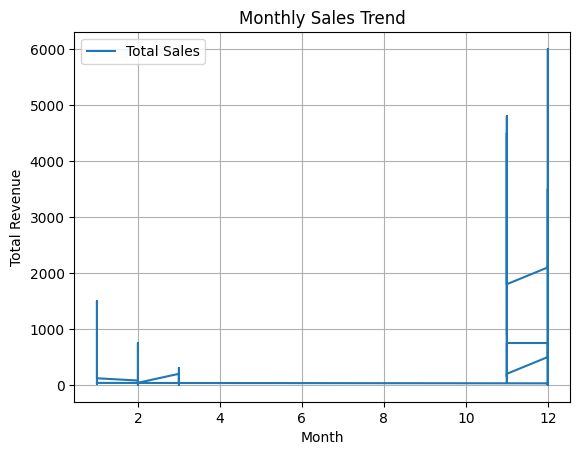

In [142]:
import matplotlib.pyplot as plt

# Plot monthly sales trend with month on x-axis and total_revenue on y-axis

plt.plot(c_orders_data_df['month'], c_orders_data_df['total_revenue'])
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.legend(['Total Sales'])
plt.show()

## Database Connection

In [143]:
# Display the info of each DataFrame
print('\nCustomers DataFrame:')
print(c_customers_data_df.info())

print('\nInventory DataFrame:')
print(c_inventory_data_df.info())

print('\nOrder Items DataFrame:')
print(c_order_item_data_df.info())

print('\nOrders DataFrame:')
print(c_orders_data_df.info())

print('\nProducts DataFrame:')
print(c_products_data_df.info())

print('\nSuppliers DataFrame:')
print(c_suppliers_data_df.info())


Customers DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    50 non-null     int64         
 1   customer_name  50 non-null     string        
 2   email          50 non-null     string        
 3   join_date      50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), string(2)
memory usage: 1.7 KB
None

Inventory DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product_name        200 non-null    string        
 1   stock_quantity      200 non-null    int64         
 2   stock_date          200 non-null    datetime64[ns]
 3   supplier            200 non-null    string        
 4   warehouse_location  200 non-nu

In [144]:
c_orders_data_df.dtypes
c_orders_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       570 non-null    int64         
 1   customer_id    570 non-null    int64         
 2   order_date     570 non-null    datetime64[ns]
 3   product_id     570 non-null    int64         
 4   quantity       570 non-null    int64         
 5   total_revenue  570 non-null    float64       
 6   year           570 non-null    int32         
 7   month          570 non-null    int32         
 8   day            570 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(4)
memory usage: 33.5 KB


In [145]:
%pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [146]:
# c_orders_data_df.info()
# c_order_item_data_df.head()

# c_suppliers_data_df.info()
# c_suppliers_data_df.head()
# c_suppliers_data_df['contract'].dtypes


In [ ]:
from sqlalchemy import create_engine

host = 'localhost'
port = '5432'
dbname = 'shop_ease_db'
user = 'postgres'
password = '#Post1'

# Create connection to the database
engine = create_engine(f"postgresql+psycopg://{user}:{password}@{host}:{port}/{dbname}")

# Test the connection
conn = engine.connect()
print("Connection to PostgreSQL DB successful")
# connection.close()


with conn:
    # Customers
    c_customers_data_df.to_sql('customers', conn, if_exists='append', index=False)

    # Inventory
    c_inventory_data_df.to_sql('inventory', conn, if_exists='append', index=False)

    # Order Items
    c_order_item_data_df.to_sql('order_items', conn, if_exists='append', index=False)

    # Orders
    c_orders_data_df.to_sql('orders', conn, if_exists='append', index=False)

        # Products
    c_products_data_df.to_sql('products', conn, if_exists='append', index=False)

    # Suppliers
    c_suppliers_data_df.to_sql('suppliers', conn, if_exists='append', index=False)
        
    print("Data loaded to database successfully.")

Connection to PostgreSQL DB successful
Data loaded to database successfully.


In [ ]:
# def connect_to_db(df_and_table_name):
#     """
#     Load data to database using SQLAlchemy and Panda `.to_sql` function

#     Args:
#         df_and_table_name (dict): Dictionary of dataframes and table names
#     """
#     with conn:
#         for df, table_name in df_and_table_name.items():
#             df.to_sql(table_name, conn, if_exists='append', index=False)
#             print(f"Data loaded to {table_name} successfully.")
#     print("Data loaded to database successfully.")


# df_and_table_name = {
#     c_customers_data_df: 'customers',
#     c_inventory_data_df: 'inventory',
#     c_order_item_data_df: 'order_items',
#     c_orders_data_df: 'orders',
#     c_products_data_df: 'products',
#     c_suppliers_data_df: 'suppliers'
# }

# # Load data to database
# connect_to_db(df_and_table_name)

In [154]:
# Querying the database to see some data
host = 'localhost'
port = '5432'
dbname = 'shop_ease_db'
user = 'postgres'
password = '#Post1'

# Create connection to the database
engine = create_engine(f"postgresql+psycopg://{user}:{password}@{host}:{port}/{dbname}")

# Querying the database
with engine.connect() as conn:
    query = "SELECT * FROM orders"
    
    print("Data from orders table:")
    c_orders_data_df = pd.read_sql(query, conn)
    display(c_orders_data_df.head())
    
    print("Data from order_items table:")
    query = "SELECT * FROM order_items"
    c_order_item_data_df = pd.read_sql(query, conn)
    display(c_order_item_data_df.head())
    
    print("Data from products table:")
    query = "SELECT * FROM products"
    c_products_data_df = pd.read_sql(query, conn)
    display(c_products_data_df.head())
    
    print("Data from suppliers table:")
    query = "SELECT * FROM suppliers"
    c_suppliers_data_df = pd.read_sql(query, conn)
    display(c_suppliers_data_df.head())
    




Data from orders table:


,order_id,customer_id,order_date,product_id,quantity,total_revenue,year,month,day
0,1,20,2024-11-01,3,2,900.0,2024,11,1
1,2,36,2024-11-01,1,1,900.0,2024,11,1
2,3,1,2024-11-01,8,3,1800.0,2024,11,1
3,4,36,2024-11-02,6,1,1350.0,2024,11,2
4,5,14,2024-11-02,12,2,1800.0,2024,11,2


Data from order_items table:


,order_detail_id,order_id,quantity,product_id
0,1,1,3,34
1,2,1,2,47
2,3,2,4,10
3,4,2,3,77
4,5,3,2,76


Data from products table:


,product_id,product_name,category,price
0,1,Laptop,Electronics,1200.0
1,2,Smartphone,Electronics,800.0
2,3,Tablet,Electronics,450.0
3,4,Wireless Mouse,Electronics,25.0
4,5,Keyboard,Electronics,50.0


Data from suppliers table:


,supplier_name,supplier_address,email,contact_number,fax,account_number,order_history,contract,supplier_country,supplier_city,country_code
0,Supplier D,321 Pine St,supplierD@example.com,4567890123,3987654318,44445555,468,No,Germany,Berlin,49
1,Supplier D,321 Pine St,supplierD@example.com,4567890123,3987654318,44445555,61,No,Germany,Berlin,49
2,Supplier D,321 Pine St,supplierD@example.com,4567890123,3987654318,44445555,88,No,Germany,Berlin,49
3,Supplier A,123 Main St,supplierA@example.com,1234567890,987654321,11112222,353,Yes,USA,New York,1
4,Supplier D,321 Pine St,supplierD@example.com,4567890123,3987654318,44445555,547,No,Germany,Berlin,49
